### NAME: MOHAN S
### REGISTER NUMBER: 212223240094

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
print(data.head())
print("\n\n")
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [4]:
x = data.drop('price', axis=1)
y = data['price']

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)).ravel()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [7]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

In [8]:
sgd_model.fit(x_train, y_train)

SGDRegressor()

In [9]:
y_pred = sgd_model.predict(x_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print()
print()
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)



Mean Squared Error: 0.1359244053452971
R-squared Score: 0.8570063012350981


In [12]:
print("\n\n")
print("Model Coefficients")
print("Coefficients:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)




Model Coefficients
Coefficients: [ 0.05369672  0.09666464 -0.00410672  0.19795702  0.01777183  0.16464546
  0.3099118  -0.03965944 -0.07548736 -0.00929429  0.12895672  0.00149291
 -0.01192805 -0.02620803 -0.02279525  0.0065078   0.00755576 -0.03008614
 -0.09278074 -0.01333754 -0.06870522 -0.04413347  0.07907527  0.21541033
  0.01254266 -0.08296291  0.08784197  0.00036265  0.00599069  0.00170416
 -0.03547903 -0.15347229 -0.07909596  0.00165498 -0.03145394  0.00170416
 -0.01602979  0.0010027   0.02279525  0.00165498 -0.03888737 -0.03751588
 -0.01781137]
Intercept: [-0.02364557]


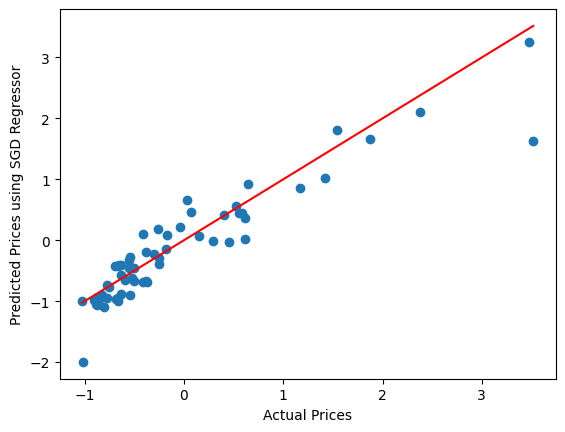

In [13]:
print("\n\n")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.show()

### NAME: MOHAN S
### REGISTER NUMBER: 212223240094